In [7]:
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import numpy as np

## Problem 4   (40 points)
#### Chemical reactions often follow the model:
$$reaction \ rate=-k(C_A )^n$$
#### where 
- #### reaction rate is the rate of change of $C_A$ with respect to time ($dC_A/dt$),
- #### $C_A$ is the concentration of species A, 
- #### $k$ is the reaction rate constant, and 
- #### $n$ is the reaction order.  

#### Armed with this theoretical understanding, you have entered the laboratory and measured the following data:

| t (min) | 10   | 20   | 30   | 40   | 50   | 60   | 70   | 80   | 90   | 100  |
|---------|------|------|------|------|------|------|------|------|------|------|
| Ca (M)    | 3.56 | 2.48 | 1.75 | 1.28 | 0.88 | 0.64 | 0.42 | 0.29 | 0.21 | 0.15 |

In [8]:
time = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Ca = [3.56, 2.48, 1.75, 1.28, 0.88, 0.64, 0.42, 0.29, 0.21, 0.15]

#### (a) Is species A a reactant or product in this system? Justify briefly.

A is a reactant, since its concentration is gradually decreasing.

#### (b)	Regress a <ins>linearized form</ins> of the reaction rate expression to the measured data.  Provide a plot of your linearized data and the linear regression to it.  What are your estimated values for $k$ and $n$? 

##### **Hints**:  
- #### No integration is necessary.
- #### You might find it beneficial to start by multiplying both sides of the reaction rate expression by $-1$ such that $-(reaction \ rate)=kC_A^n$.

Suspect that reaction rate is proportional to concentration squared, based on experience
Calculate reaction rate using centered finite difference with step size h = 10 min

k = 0.036, n = 2


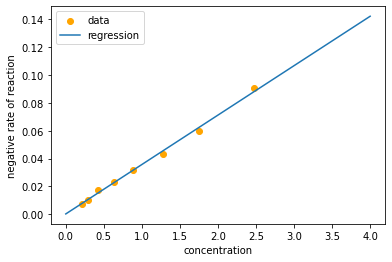

In [9]:
linCa = [i ** 1 for i in Ca]
negRate = []
for i in range(1, 9):
    negRate.append(-(Ca[i + 1] - Ca[i - 1]) / 20)
plt.scatter(linCa[1:9], negRate, label='data', color='orange')
result = linregress(linCa[1:9], negRate)
m = result.slope
c = result.intercept
x = np.linspace(0, 4, 100)
y = [i * m + c for i in x]
plt.plot(x, y, label='regression')
plt.legend()
plt.ylabel('negative rate of reaction')
plt.xlabel('concentration')
print(f'k = {round(m, 3)}, n = 2')

#### (c) Chemical reactions are often, but not always, ‘elementary’ such that the reaction order is an integer.  Assuming that your reaction is also elementary, it is possible to integrate the reaction rate expression (i.e., $reaction \ rate=-kC_A^n$) to yield an equation for $C_A$ as a function of time ($t$), even without applying an initial condition or data to determine the integration constant.  
#### Generate $C_A$  versus $t$ relationships for $n =$ 0, 1, and 2;  then linearize each and plot your measured data on such linearized axes.  Create a multipaneled figure with three separate axes to present your solution.  Rationalize your observations relative to the results from part (b) – are your conclusions from these approaches consistent?

$$n = 0: C_A = -kt$$
$$n = 1: C_A = Ae^{-kt}$$
$$n = 2: C_A = \frac{1}{kt}$$

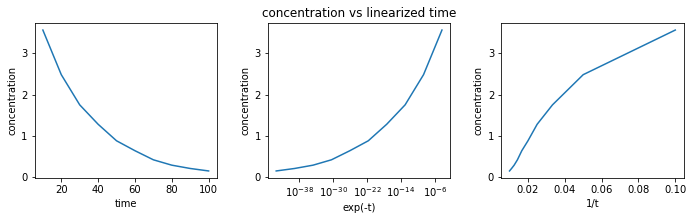

In [10]:
t0 = time
t1 = [math.exp(-i) for i in time]
t2 = [1/i for i in time]

fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

plt.tight_layout(pad=2)
ax1.set_ylabel('concentration')
ax2.set_ylabel('concentration')
ax3.set_ylabel('concentration')
ax1.set_xlabel('time')
ax2.set_xlabel('exp(-t)')
ax3.set_xlabel('1/t')
ax2.set_xscale('log')
ax2.set_title('concentration vs linearized time')

ax1.plot(t0, Ca)
ax2.plot(t1, Ca)
ax3.plot(t2, Ca)


n = 1 seems to present the best linearised result. This is inconsistent with my result from (b), but the approach in (c) seems to show that my assumption in (b) that reaction rate is proportional to concentration squared is incorrect.

#### (d) Applying the elementary reaction order most appropriate for your system, linearly regress the appropriate reaction rate to the measured data.  Provide a plot of your linearized data and the linear regression to it.  What is your estimated value for $k$?

k = 0.036, n = 1


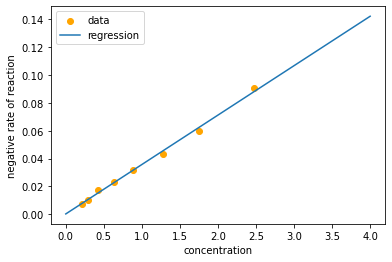

In [11]:
linCa = [i ** 1 for i in Ca]
negRate = []
for i in range(1, 9):
    negRate.append(-(Ca[i + 1] - Ca[i - 1]) / 20)
plt.scatter(linCa[1:9], negRate, label='data', color='orange')
result = linregress(linCa[1:9], negRate)
m = result.slope
c = result.intercept
x = np.linspace(0, 4, 100)
y = [i * m + c for i in x]
plt.plot(x, y, label='regression')
plt.legend()
plt.ylabel('negative rate of reaction')
plt.xlabel('concentration')
print(f'k = {round(m, 3)}, n = 1')

#### (e) Plot the $C_A$ versus $t$ data, as well as the linearly regressed model that you have determined.  Comment briefly on the quality of the fit and your observations.

$$Ae^{-0.036 * 10} = 3.56$$
$$A=0.51$$

Text(0.5, 0, 'time')

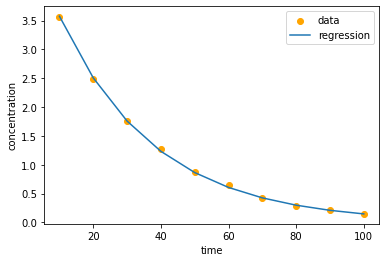

In [12]:
plt.scatter(time, Ca, label='data', color='orange')
regCa = [5.1*math.exp(-m * i) for i in time]
plt.plot(time, regCa, label='regression')
plt.legend()
plt.ylabel('concentration')
plt.xlabel('time')

The regressed model fits the data very well.

#### (f)	What is the concentration of species A initially in the reactor?

$$initialconc = 5.1 * e^0 = 5.1M$$